In [1]:
pip install dadapy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from dadapy import Data


In [3]:
X = np.load('cifar10_cats.npy')


In [4]:
def generate_real_samples(dataset, n_samples, replace=True):
	if replace:
		# choose random instances (with replacement)
		ix = np.random.randint(0, dataset.shape[0], n_samples)
	else:
		# without replacement (must be less than total number of real images in dataset)
		ix = np.random.choice(dataset.shape[0], n_samples, replace=False)
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = np.ones((n_samples, 1))
	return X,y

def calculate_intrinsic_dimension(data):
	"""
	Estimate the intrinsic dimension of a dataset using the 2NN method from GUDHI.

	Parameters:
	data (numpy.ndarray): The dataset, where each row is a datapoint.

	Returns:
	float: The estimated intrinsic dimension.
	"""
	

	# Fit the model on the data and estimate the dimension
	ID1, err1, scale1 = Data(data).compute_id_2NN(decimation = 1)
	return ID1, err1, scale1


def intr_dim_real(dataset, n_samples=1000):
	x_real, _ = generate_real_samples(dataset, n_samples, replace=False)

	# unravel each x_fake tensor into a flat vector (datapoint) so that we have a set of n_samples datapoints
	x_fake_flat = x_real.reshape(n_samples, -1)  # Reshaping to (n_samples, 3072)

	# calculate intrinsic dimensions of x_fake
	intrinsic_dim,err1,_ = calculate_intrinsic_dimension(x_fake_flat)
	# Note: You'll need to define `calculate_intrinsic_dimension` based on your chosen method

	# save result to file (or print it out), include the epoch in the file name
	filename = f"intrinsic_dim_real.txt"
	with open(filename, "w") as file:
		file.write(f"Intrinsic Dimension of real data: {intrinsic_dim} Standard error: {err1}\n")

	# Alternatively, just print it out
	print(f"Intrinsic Dimension of real data: {intrinsic_dim} Standard error: {err1}\n")

In [5]:
dataset = X

intr_dim_real(dataset)


Intrinsic Dimension of real data: [23.72] Standard error: 0.0



In [6]:
pip install giotto-tda


Note: you may need to restart the kernel to use updated packages.


In [7]:
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy
from gtda.pipeline import make_pipeline

In [8]:

    
    
    
    
def pers_diag(dataset, n_samples=250):
    x_real, _ = generate_real_samples(dataset, n_samples, replace=False)

    VR_persistence = VietorisRipsPersistence(homology_dimensions=[0, 1, 2,3,4])
    
    #x_real_reshaped = x_real.reshape(-1, x_real.shape[-1], 1)
    x_real_flat = x_real.reshape(n_samples, -1)  # Reshaping to (n_samples, 3072)
    #x_real_flat_reshaped = x_real_flat[:,:,np.newaxis]
    x_real_flat_reshaped = x_real_flat.reshape(1,x_real_flat.shape[0],x_real_flat.shape[1])

    print("x_real_flat_reshaped.shape:", x_real_flat_reshaped.shape)
    print("x_real_flat_reshaped:", x_real_flat_reshaped)
    
    Xt = VR_persistence.fit_transform(x_real_flat_reshaped)

    # np.save(f"Xt_epoch_{epoch}.npy", Xt)
    diagram_plt = VR_persistence.plot(Xt)

    return diagram_plt

    
    
 
 

In [9]:
#pers_diag(dataset)

In [10]:
#entro_109 = np.load("/Users/anupamchaudhauri/Desktop/Code_source/GAN_exp_1000/entropy_epoch_109.npy")

In [11]:
 xt_109 = np.load("/Users/anupamchaudhauri/Desktop/Code_source/GAN_exp_1000/Xt_epoch_109.npy")

In [12]:
VR_persistence = VietorisRipsPersistence(homology_dimensions=[0, 1, 2], n_jobs = -1)

In [13]:
#pipeline = make_pipeline(VR_persistence, PersistenceEntropy())
# Fit and transform
#entropy = pipeline.fit_transform(xt_109)


In [14]:
from gtda.diagrams import PersistenceEntropy
PE = PersistenceEntropy()
features = PE.fit_transform(xt_109)

In [15]:
features

array([[9.95, 9.81, 9.23]])

In [16]:
from gtda.diagrams import Amplitude
AMP = Amplitude(metric="wasserstein")

In [17]:

epochs = list(range(9, 200, 10))

xt = {}
entropy = {}
amps = {}

for i in epochs:
    file_path = f"/Users/anupamchaudhauri/Desktop/Code_source/GAN_exp_1000/Xt_epoch_{i}.npy"
    xt[i] = np.load(file_path)
    # Do something with xt_i, like storing it in a dictionary or processing it
    entropy[i] = PE.fit_transform(xt[i])
    # conjecture: lifespansum is proportional to wasserstein distance from trivial (diagonal) diagram
    amps[i] = AMP.fit_transform(xt[i])


In [18]:
entropy

{9: array([[9.8 , 8.57, 7.35]]),
 19: array([[9.9, 9.2, 8.2]]),
 29: array([[9.95, 9.88, 9.73]]),
 39: array([[9.94, 9.71, 9.21]]),
 49: array([[ 9.94, 10.01, 10.04]]),
 59: array([[ 9.95, 10.06,  9.93]]),
 69: array([[9.94, 9.81, 9.31]]),
 79: array([[9.95, 9.9 , 9.63]]),
 89: array([[9.94, 9.39, 8.48]]),
 99: array([[9.95, 9.7 , 9.16]]),
 109: array([[9.95, 9.81, 9.23]]),
 119: array([[9.95, 9.54, 8.57]]),
 129: array([[9.95, 9.82, 9.49]]),
 139: array([[9.95, 9.44, 8.48]]),
 149: array([[9.95, 9.09, 7.76]]),
 159: array([[9.94, 8.6 , 6.84]]),
 169: array([[9.94, 8.68, 7.04]]),
 179: array([[9.95, 8.92, 7.69]]),
 189: array([[9.95, 8.95, 7.61]]),
 199: array([[9.94, 8.78, 7.22]])}

In [19]:
amps

{9: array([[63.53,  7.06,  1.57]]),
 19: array([[165.46,  19.22,   7.14]]),
 29: array([[280.31,  29.56,  13.46]]),
 39: array([[255.84,  21.12,   8.97]]),
 49: array([[332.24,  29.69,  15.75]]),
 59: array([[324.81,  28.08,  13.57]]),
 69: array([[292.89,  20.75,   8.37]]),
 79: array([[288.55,  23.35,  10.47]]),
 89: array([[305.04,  18.18,   6.24]]),
 99: array([[255.11,  19.54,   8.01]]),
 109: array([[274.84,  17.96,   7.04]]),
 119: array([[315.81,  15.43,   6.17]]),
 129: array([[367.36,  24.78,  10.95]]),
 139: array([[308.66,  14.38,   4.94]]),
 149: array([[329.41,  14.31,   5.24]]),
 159: array([[317.32,  10.11,   2.54]]),
 169: array([[351.37,  11.46,   3.26]]),
 179: array([[352.83,  11.58,   3.78]]),
 189: array([[359.69,  12.73,   3.91]]),
 199: array([[331.43,  10.25,   2.94]])}

In [20]:
xt_real = np.load("/Users/anupamchaudhauri/Desktop/Code_source/GAN_exp_1000/Xt_real.npy")

In [21]:
entropy_real = PE.fit_transform(xt_real)

In [22]:
entropy_real

array([[9.94, 7.48, 5.36]])

In [23]:
ams_real = AMP.fit_transform(xt_real)

In [24]:
ams_real

array([[349.44,   6.42,   1.47]])

In [25]:
epochs = list(range(9, 500, 10))

xt_epoch_500 = {}
entropy_epoch_500 = {}
amps_epoch_500 = {}

for i in epochs:
    file_path = f"/Users/anupamchaudhauri/Desktop/Code_source/GAN_exp_1000_epoch_500/Xt_epoch_{i}.npy"
    xt_epoch_500[i] = np.load(file_path)
    # Do something with xt_i, like storing it in a dictionary or processing it
    entropy_epoch_500[i] = PE.fit_transform(xt_epoch_500[i])
    # conjecture: lifespansum is proportional to wasserstein distance from trivial (diagonal) diagram
    amps_epoch_500[i] = AMP.fit_transform(xt_epoch_500[i])


In [26]:
entropy_epoch_500

{9: array([[9.87, 8.55, 6.64]]),
 19: array([[9.89, 9.32, 8.42]]),
 29: array([[9.94, 9.88, 9.75]]),
 39: array([[9.93, 9.86, 9.67]]),
 49: array([[9.94, 9.92, 9.99]]),
 59: array([[9.94, 9.69, 9.05]]),
 69: array([[9.94, 9.33, 8.3 ]]),
 79: array([[9.95, 9.71, 9.36]]),
 89: array([[9.94, 9.35, 8.55]]),
 99: array([[9.96, 9.9 , 9.54]]),
 109: array([[9.94, 9.11, 7.99]]),
 119: array([[9.94, 9.41, 8.32]]),
 129: array([[9.95, 9.66, 9.08]]),
 139: array([[9.94, 8.93, 7.51]]),
 149: array([[9.94, 8.64, 7.16]]),
 159: array([[9.93, 8.21, 6.68]]),
 169: array([[9.94, 9.15, 8.22]]),
 179: array([[9.94, 8.87, 7.88]]),
 189: array([[9.94, 8.86, 7.59]]),
 199: array([[9.93, 8.18, 6.36]]),
 209: array([[9.93, 8.46, 6.6 ]]),
 219: array([[9.92, 8.53, 6.8 ]]),
 229: array([[9.94, 8.52, 6.91]]),
 239: array([[9.94, 9.04, 7.87]]),
 249: array([[9.95, 8.95, 7.43]]),
 259: array([[9.94, 8.76, 7.56]]),
 269: array([[9.94, 8.6 , 7.06]]),
 279: array([[9.94, 8.65, 7.11]]),
 289: array([[9.94, 8.7 , 7.12]

In [27]:
amps_epoch_500

{9: array([[89.88, 12.29,  3.47]]),
 19: array([[195.18,  21.88,   8.45]]),
 29: array([[262.53,  26.73,  13.04]]),
 39: array([[290.69,  25.95,  12.39]]),
 49: array([[304.54,  27.5 ,  13.8 ]]),
 59: array([[333.94,  23.28,   9.79]]),
 69: array([[284.38,  18.42,   6.56]]),
 79: array([[312.48,  22.04,   8.9 ]]),
 89: array([[291.44,  18.52,   7.  ]]),
 99: array([[310.4 ,  20.5 ,   8.02]]),
 109: array([[326.35,  13.85,   3.96]]),
 119: array([[298.27,  11.42,   4.23]]),
 129: array([[347.13,  16.83,   6.59]]),
 139: array([[318.19,  10.23,   3.14]]),
 149: array([[345.42,  10.13,   3.01]]),
 159: array([[293.17,   8.12,   2.61]]),
 169: array([[328.94,  13.01,   4.86]]),
 179: array([[344.94,  11.4 ,   3.87]]),
 189: array([[301.77,  10.93,   3.18]]),
 199: array([[357.92,   7.37,   1.93]]),
 209: array([[316.87,   7.58,   2.04]]),
 219: array([[371.33,  12.46,   3.29]]),
 229: array([[347.53,   9.26,   2.42]]),
 239: array([[345.15,  12.94,   4.28]]),
 249: array([[382.18,  11.19, 

In [28]:
xt_real_epoch_500 = np.load("/Users/anupamchaudhauri/Desktop/Code_source/GAN_exp_1000_epoch_500/Xt_real.npy")

In [29]:
entropy_real_epoch_500 = PE.fit_transform(xt_real_epoch_500)

In [30]:
ams_real_epoch_500 = AMP.fit_transform(xt_real_epoch_500)

In [31]:
entropy_real_epoch_500

array([[9.94, 7.55, 5.12]])

In [32]:
ams_real_epoch_500

array([[355.74,   6.18,   1.37]])

In [33]:
import sys
sys.path.append("/Users/anupamchaudhauri/Desktop/Code_source/eulearning")


In [34]:
pip install numba


Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install tadasets


Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install Gudhi

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install Cython

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [39]:
#!pip uninstall GraphRicciCurvature

In [40]:
!pip install GraphRicciCurvature

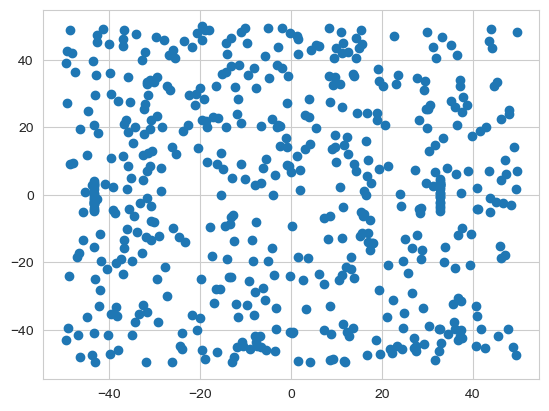

In [41]:
import matplotlib.pyplot as plt
from eulearning.datasets import gen_dense_lines_with_noise

X = gen_dense_lines_with_noise(n_pattern=2)

plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.show()

In [42]:
dataset.shape

(5000, 32, 32, 3)

In [43]:
import numpy as np
import gudhi as gd
from eulearning.utils import vectorize_st

ac = gd.AlphaComplex(X)			# Initialize the alpha complex
st = ac.create_simplex_tree() 		# Compute the alpha filtration
vec_st = vectorize_st(st)		# Vectorize the simplex tree

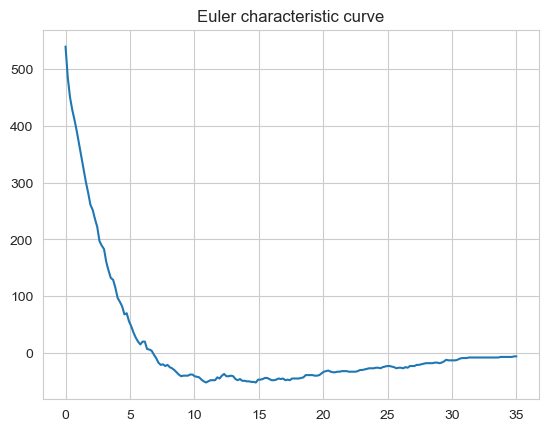

In [44]:
from eulearning.descriptors import EulerCharacteristicProfile

# Choose your method to compute Euler characteristic curves
## e.g. using quantiles
euler_curve = EulerCharacteristicProfile(resolution=(200,), quantiles=[(0, 0.95)], pt_cld=True, normalize=False)

## e.g. using specified bounds
euler_curve = EulerCharacteristicProfile(resolution=(200,), val_ranges=[(0, 35)], pt_cld=True, normalize=False)

# Compute Euler curves
ecc = euler_curve.fit_transform(vec_st)

# Plot Euler curves
ecc_range = np.linspace(euler_curve.val_ranges[0][0], euler_curve.val_ranges[0][1], euler_curve.resolution[0])
plt.figure()
plt.plot(ecc_range, ecc)
plt.title('Euler characteristic curve')
plt.show()

In [45]:
dataset[:1000].shape

(1000, 32, 32, 3)

In [46]:
indices = np.random.choice(dataset.shape[0], 50, replace=False)
reduced_dataset = dataset[indices]

flattened_dataset1 = reduced_dataset.reshape(reduced_dataset.shape[0], -1)


In [47]:
# ac1 = gd.AlphaComplex(flattened_dataset1)
# st1 = ac1.create_simplex_tree()
# vec_st1 = vectorize_st(st1)

In [ ]:
ac1 = gd.AlphaComplex(flattened_dataset1)

In [48]:
dataset.shape

(5000, 32, 32, 3)

In [49]:
32 * 32 * 3

3072